# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
# This data represents 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 
# 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mpl_toolkits.axes_grid1 import make_axes_locatable
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
import numpy as np
import matplotlib as mpl

In [3]:
df = pd.read_csv('/Users/chameleonjj/Downloads/module_17_starter/data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
# I will rename target column 'y' to 'term_dep' to avoid the confusion
df.rename(columns={'y': 'term_dep'}, inplace=True)

In [6]:
# In the task 5 it is indicated that we will work on columns 1-7. Hence creating a dataframe with only these features
# and column 'term_dep' as a target.
df = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'term_dep']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
 7   term_dep   41188 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.5+ MB


In [7]:
# Understanding the values and checking for unusual values, typos... in column 'job'
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [8]:
# Understanding the values and checking for unusual values, typos... in column 'marital'
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [9]:
# Understanding the values and checking for unusual values, typos... in column 'education'
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [10]:
# Understanding the values and checking for unusual values, typos... in column 'default'
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [11]:
# Understanding the values and checking for unusual values, typos... in column 'housing'
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [12]:
# Understanding the values and checking for unusual values, typos... in column 'loan'
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [13]:
# Checking if there is any missing data
df.isna().any().any()

False

In [14]:
# Looks like no missing data. Now checking for abnormal values in the columns.
df['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

In [15]:
# To open a bank account in Portugal, applicants must be aged at least 18.
# It is safe to assume that the life span runs through 99.
# I will check if any values are out of ordinary based on the above statements.
age_filter = (df['age'] < 18) | (df['age'] > 99)
df[age_filter]['age']

37140    17
37539    17
37558    17
37579    17
38274    17
Name: age, dtype: int64

In [16]:
# The 17 year old clients can't have a bank account and therefore I will delete rows (5) for these customers.
df = df[df['age'] != 17]

In [17]:
# Checking for anomaly values in the remaining columns.
df['default'].value_counts()

no         32583
unknown     8597
yes            3
Name: default, dtype: int64

In [18]:
# Out of remaining columns only 'default' column has a concerning data distribution. Since there are only 3
# (less than 0.008%) defults it doesn't make sense to keep this column. 
df.drop('default', axis=1, inplace=True)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41183 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41183 non-null  int64 
 1   job        41183 non-null  object
 2   marital    41183 non-null  object
 3   education  41183 non-null  object
 4   housing    41183 non-null  object
 5   loan       41183 non-null  object
 6   term_dep   41183 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.5+ MB


In [20]:
# The business objective is to predict if a bank client will sign up for a term deposit based on their information.
# The outcome helps the bank to make more informed decisions on marketing campaigns and to tailor their services to 
# better fit the clients' needs. This should ultimately lead to increased customer satisfaction, retention, and 
# improve bank profitability.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [21]:
# Using ordinal encoding for features 'housing' and 'loan'
encoder = OrdinalEncoder(categories=[['no', 'unknown', 'yes']] * 2)
df[['housing', 'loan']] = encoder.fit_transform(df[['housing', 'loan']])

In [22]:
# Using ordinal encoding for target feature
df['term_dep'] = df['term_dep'].map({'no': 0, 'yes': 1})

In [23]:
# Spliting the dataframe into the feature columns and the target column
X = df.drop('term_dep', axis=1)
y = df['term_dep']

0    36545
1     4638
Name: term_dep, dtype: int64


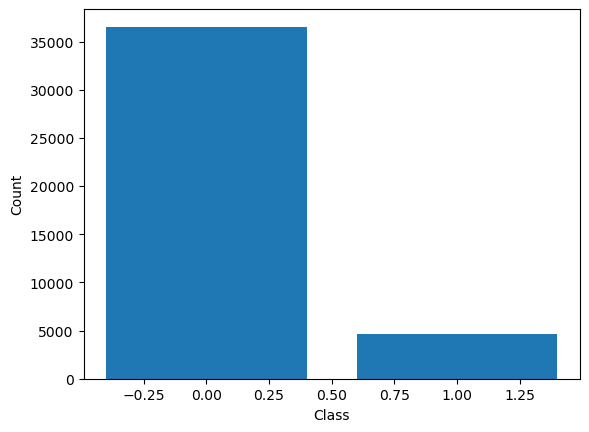

In [24]:
# Checking if the dataset is balanced
class_counts = df['term_dep'].value_counts()
print(class_counts)
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [25]:
# The data is imbalanced as we can see in the above chart. Imbalanced data can negatively impact the performance of 
# machine learning models, especialy the minority class is of interest. Which in our case term deposit happens to be
# the minority class. Therefore I will explore balancing the data to improve the performance of the models. I will 
# include 2 additional jupyter notebooks:
# for balanced data with undersampling,
# for balanced data with oversampling.
# In this notebook I will continue exploring the unbalanced data

In [26]:
# Doing OHE
X = pd.get_dummies(X, columns=['job', 'marital', 'education'])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [27]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
                                                    , random_state=42)

In [28]:
# StandardScaler works best with features that have a normal distribution.
# Using Shapiro-Wilk test if features have normal distribution.
for col in X.columns:
    stat, p = shapiro(X[col])
    alpha = 0.05
    if p > alpha:
        print(f'{col} is normally distributed (fail to reject H0)')
    else:
        print(f'{col} is not normally distributed (reject H0)')

age is not normally distributed (reject H0)
housing is not normally distributed (reject H0)
loan is not normally distributed (reject H0)
job_admin. is not normally distributed (reject H0)
job_blue-collar is not normally distributed (reject H0)
job_entrepreneur is not normally distributed (reject H0)
job_housemaid is not normally distributed (reject H0)
job_management is not normally distributed (reject H0)
job_retired is not normally distributed (reject H0)
job_self-employed is not normally distributed (reject H0)
job_services is not normally distributed (reject H0)
job_student is not normally distributed (reject H0)
job_technician is not normally distributed (reject H0)
job_unemployed is not normally distributed (reject H0)
job_unknown is not normally distributed (reject H0)
marital_divorced is not normally distributed (reject H0)
marital_married is not normally distributed (reject H0)
marital_single is not normally distributed (reject H0)
marital_unknown is not normally distributed (

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [29]:
# Since majority of features are not normally distributed I will use MinMaxScaler
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [30]:
#Creating the baseline model
class_counts = df['term_dep'].value_counts()
majority_class = class_counts.idxmax()
y_baseline = np.full(df.shape[0], majority_class)
accuracy = accuracy_score(df['term_dep'], y_baseline)
print(f'The baseline performance that our classifier should aim to beat is accuracy of {accuracy}')

The baseline performance that our classifier should aim to beat is accuracy of 0.8873807153437098


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

Classifier: Logistic Regression
Training time: 0.10s
Training accuracy: 0.8866
Testing accuracy: 0.8893
Cross-validation scores: [0.88657648 0.88657648 0.88657648 0.88655681 0.88655681]
Mean cross-validation accuracy: 0.8866
Standard deviation of cross-validation accuracy: 0.0000
Precision: 1.0000
Recall: 0.0000
F1 score: 0.0000
AUC: 0.5000

Classifier: KNN
Training time: 0.00s
Training accuracy: 0.8883
Testing accuracy: 0.8805
Cross-validation scores: [0.87669095 0.88015956 0.87044745 0.87372073 0.87562879]
Mean cross-validation accuracy: 0.8753
Standard deviation of cross-validation accuracy: 0.0032
Precision: 0.2823
Recall: 0.0512
F1 score: 0.0866
AUC: 0.5175

Classifier: Decision Tree
Training time: 0.05s
Training accuracy: 0.9123
Testing accuracy: 0.8693
Cross-validation scores: [0.85848075 0.86056191 0.85796046 0.86782307 0.8633131 ]
Mean cross-validation accuracy: 0.8616
Standard deviation of cross-validation accuracy: 0.0036
Precision: 0.2545
Recall: 0.0936
F1 score: 0.1368
AUC

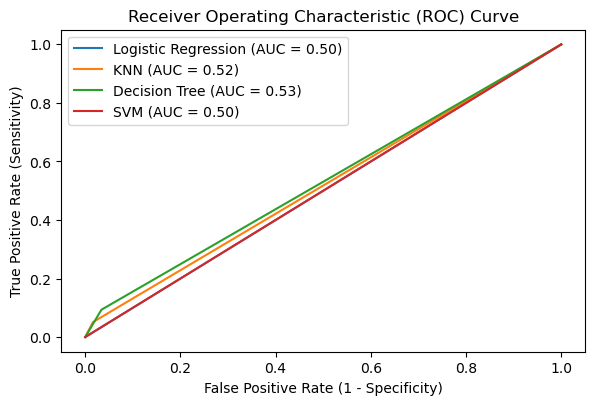

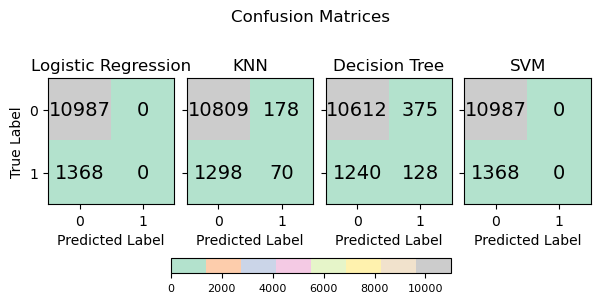

,Training time,Training accuracy,Testing accuracy
Logistic Regression,0.101466,0.886569,0.889276
KNN,0.001714,0.888303,0.880534
Decision Tree,0.050347,0.912342,0.869284
SVM,24.776971,0.886569,0.889276


In [31]:
# Initializing the classifiers
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
svm = SVC()

# Initializing dictionary to store confusion matrices
confusion_matrix_dict = {}

# Training and evaluating the classifiers
for clf, clf_name in [(logreg, 'Logistic Regression'), (knn, 'KNN'), (dt, 'Decision Tree'), (svm, 'SVM')]:
    start_time = time.time()
    clf.fit(X_train_scaled, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    # Predicting using the trained classifier
    y_pred_train = clf.predict(X_train_scaled)
    training_accuracy = accuracy_score(y_train, y_pred_train)
    
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    auc_score = roc_auc_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Plotting ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')
    
    # Storing confusion matrix in dictionary
    confusion_matrix_dict[clf_name] = confusion
    
    # Creating dictionary to hold results for this model
    results = {}
    results['Training time'] = training_time
    results['Training accuracy'] = training_accuracy
    results['Testing accuracy'] = accuracy
    
    # Adding results to table
    if clf_name == 'Logistic Regression':
        table = pd.DataFrame(results, index=[clf_name])
    else:
        table = pd.concat([table, pd.DataFrame(results, index=[clf_name])])

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    print(f'Classifier: {clf_name}')
    print(f'Training time: {training_time:.2f}s')
    print(f'Training accuracy: {training_accuracy:.4f}')
    print(f'Testing accuracy: {accuracy:.4f}')
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')
    print(f'Standard deviation of cross-validation accuracy: {cv_scores.std():.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 score: {f1:.4f}')
    print(f'AUC: {auc_score:.4f}')
    print()
    
# Plotting ROC curves
plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.tight_layout()
plt.gcf().set_size_inches(6,4)
plt.show()


# Plotting confusion matrices
fig, axs = plt.subplots(1, 4, figsize=(7, 3), sharex=True, sharey=True)
fig.suptitle('Confusion Matrices')

for i, clf_name in enumerate(['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']):
    confusion = confusion_matrix_dict[clf_name]
    im = axs[i].imshow(confusion, cmap='Pastel2', interpolation='None')
    axs[i].set_xticks([0, 1])
    axs[i].set_yticks([0, 1])
    axs[i].set_xlabel('Predicted Label')
    
    if i == 0:
        axs[i].set_ylabel('True Label')
    axs[i].set_title(f'{clf_name}')
    
    for j in range(2):
        for k in range(2):
            axs[i].text(k, j, str(confusion[j, k]), horizontalalignment='center', verticalalignment='center', fontsize=14)

# Adding colorbar under plot's title
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.05])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=8)

# Adjusting spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

table.head()


In [32]:
# Interpretation of models:
# **************************
# LOGISTIC REGRESSION
# This model doesn't seem to capture important patterns in the data, even though testing accuracy is 0.889276 and this
# accuracy is higher than the baseline model and along with SVM accuracy is the highest. In addition, although the
# precision is 1.0, the recall and F1 score are 0.0, which means that the model correctly identified only negative
# cases, but failed to identify any positive cases. This is confirmed by the confusion matrix which shows that all
# positive cases were classified as negative.
# The cross-validation scores are all very close to each other and to the training accuracy, indicating that the model
# is not overfitting on the training data. The mean cross-validation accuracy is also the same as the training
# accuracy, further supporting this conclusion. But the standard deviation of the cross-validation accuracy is 0,
# which could indicate that there is very little variance in the data.
# In addition AUC score of 0.5, which means the model has a performance equivalent to random chance.
# CONCLUSION: the model is likely not useful for practical applications and should be improved.
# **************************
# KNN
# This model doesn't seem to capture important patterns in the data as well. The accuracy was 0.880534 and it is lower
# than the baseline model's accuracy.
# Looking at the precision (0.2823), recall (0.0512), and F1 score (0.0866), the model is not performing well in terms
# of correctly identifying positive cases (as indicated by the low recall).
# The cross-validation scores indicate that the model is not overfitting on the training data, with a mean
# cross-validation accuracy of 0.8753 and a standard deviation of 0.0032.
# The AUC of 0.5175 indicates that the model's ability to distinguish between positive and negative cases is only
# slightly better than random guessing.
# This model is the fastest to calculate with training time of only 0.002626.
# CONCLUSION: the model is likely not useful for practical applications and should be improved.
# **************************
# DECISION TREE
# The testing accuracy (0.8694) is lower than the training accuracy, which suggests that the model may be overfitting
# to the training data. The testing accuracy is lower than the baseline model's accuracy.
# Looking at the precision (0.2565), recall (0.0943), and F1 score (0.1379)the model is not
# performing well in terms of correctly identifying positive cases (as indicated by the low recall).
# The cross-validation scores indicate that the model is not overfitting on the training data, with a mean
# cross-validation accuracy of 0.8616 and a standard deviation of 0.0038.
# The AUC of 0.5301 indicates that the model's ability to distinguish between positive and negative cases is only
# slightly better than random guessing.
# This model is the second fastest to calculate with training time of 0.050914.
# CONCLUSION: the model is likely not useful for practical applications and should be improved.
# **************************
# SVM
# This model doesn't seem to capture important patterns in the data as well, even though the testing accuracy is
# 0.889276 (the best along with logistic regression). Unfortunately looking at the precision (0.6667), recall (0.0015),
# and F1 score (0.0029) the model is not performing well in terms of correctly identifying positive cases (as
# indicated by the low recall).
# The cross-validation scores indicate that the model is not overfitting on the training data, with a mean
# cross-validation accuracy of 0.8866 and a standard deviation of 0.
# The AUC of 0.5007 indicates that the model's ability to distinguish between positive and negative cases is only
# slightly better than random guessing.
# This is the slowest model to train and it takes at least 240 times longer than any other model.
# CONCLUSION: the model is likely not useful for practical applications and should be improved.
# **************************
# **************************
# **************************
# SUMMARY
# Even though the testing accuracy for Logistic Regression and SVM is higher than baseline model's accuracy,
# all models are not useful for practical applications and should be improved.
# **************************
# **************************
# **************************

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Classifier: Logistic Regression
Best hyperparameters: {'C': 0.1, 'penalty': 'l1'}
Training time: 24.78s
Training accuracy: 0.8866
Testing accuracy: 0.8893
Cross-validation scores: [0.88657648 0.88657648 0.88657648 0.88655681 0.88655681]
Mean cross-validation accuracy: 0.8866
Standard deviation of cross-validation accuracy: 0.0000
Precision: 1.0000
Recall: 0.0000
F1 score: 0.0000
AUC: 0.5000

Classifier: KNN
Best hyperparameters: {'n_neighbors': 7}
Training time: 24.78s
Training accuracy: 0.8859
Testing accuracy: 0.8828
Cross-validation scores: [0.88657648 0.88657648 0.88657648 0.88655681 0.88655681]
Mean cross-validation accuracy: 0.8866
Standard deviation of cross-validation accuracy: 0.0000
Precision: 0.2980
Recall: 0.0431
F1 score: 0.0754
AUC: 0.5152

Classifier: Decision Tree
Best hyperparameters: {'criterion': 'gini', 'max_depth': 5}
Training time: 24.78s
Training accuracy: 0.8871
Testing accuracy: 0.8892
Cross-validation scores: [0.88657648 0.88657648 0.88657648 0.88655681 0.8865

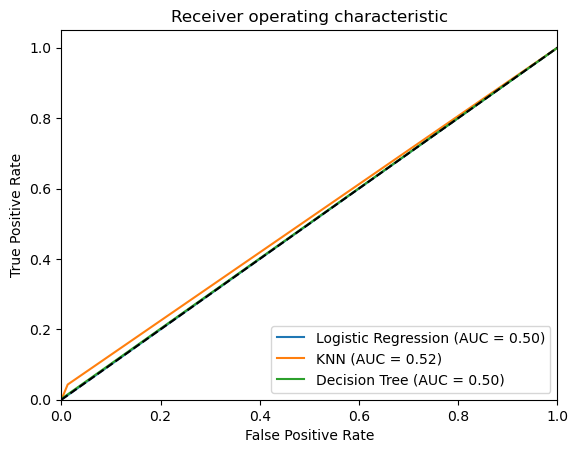

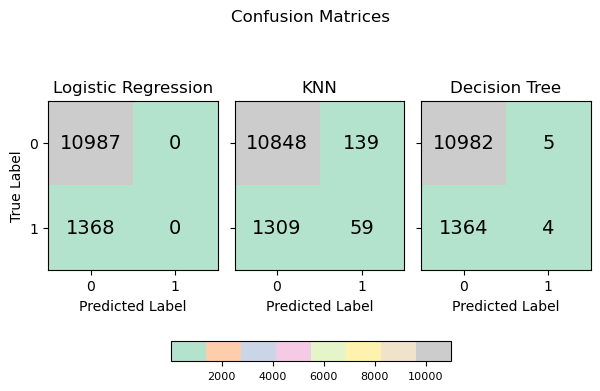

,Training time,Training accuracy,Testing accuracy
Logistic Regression,24.776971,0.886569,0.889276
KNN,24.776971,0.885910,0.882800
Decision Tree,24.776971,0.887124,0.889195


In [33]:
# Running 3 models (my machine is to slow to run SVM Model, I tried several times) and checking for best parameters.
# Initializing the classifiers with a range of hyperparameters
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
dt = DecisionTreeClassifier()

knn_param_grid = {'n_neighbors': [3, 5, 7]}
logreg_param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
dt_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15]}

# Initializing dictionary to store confusion matrices
confusion_matrix_dict = {}

# Training and evaluating the classifiers
for clf, clf_name, param_grid in [(logreg, 'Logistic Regression', logreg_param_grid), 
                                  (knn, 'KNN', knn_param_grid), 
                                  (dt, 'Decision Tree', dt_param_grid)]:
    clf_gs = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

    clf_gs.fit(X_train_scaled, y_train)
    
    # Predicting using the best hyperparameters
    clf = clf_gs.best_estimator_
    y_pred_train = clf.predict(X_train_scaled)
    training_accuracy = accuracy_score(y_train, y_pred_train)
    
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    auc_score = roc_auc_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Plotting ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')
    
    # Storing confusion matrix in dictionary
    confusion_matrix_dict[clf_name] = confusion
    
    # Creating dictionary to hold results for this model
    results = {}
    results['Training time'] = training_time
    results['Training accuracy'] = training_accuracy
    results['Testing accuracy'] = accuracy
    
    # Adding results to table
    if clf_name == 'Logistic Regression':
        table = pd.DataFrame(results, index=[clf_name])
    else:
        table = pd.concat([table, pd.DataFrame(results, index=[clf_name])])

    # Printing best hyperparameters and performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Best hyperparameters: {clf_gs.best_params_}')
    print(f'Training time: {training_time:.2f}s')
    print(f'Training accuracy: {training_accuracy:.4f}')
    print(f'Testing accuracy: {accuracy:.4f}')
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')
    print(f'Standard deviation of cross-validation accuracy: {cv_scores.std():.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 score: {f1:.4f}')
    print(f'AUC: {auc_score:.4f}')
    print()
    
# Plotting ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')

# Plotting confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(7, 4), sharex=True, sharey=True)
fig.suptitle('Confusion Matrices')

for i, clf_name in enumerate(['Logistic Regression', 'KNN', 'Decision Tree']):
    confusion = confusion_matrix_dict[clf_name]
    im = axs[i].imshow(confusion, cmap='Pastel2', interpolation='None')
    axs[i].set_xticks([0, 1])
    axs[i].set_yticks([0, 1])
    axs[i].set_xlabel('Predicted Label')
    
    if i == 0:
        axs[i].set_ylabel('True Label')
    axs[i].set_title(f'{clf_name}')
    
    for j in range(2):
        for k in range(2):
            axs[i].text(k, j, str(confusion[j, k]), horizontalalignment='center', verticalalignment='center', fontsize=14)

# Adding colorbar under plot's title
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.05])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=8)

# Adjusting spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

#Printing table of results
table.head()

In [34]:
# **************************
# **************************
# **************************
# SUMMARY
# Even though 2 models have higher testing accuracy than the baseline model, it is a very small improvement and 
# actually no improvement from the previous models.
# The cross-validation scores indicate that the model is not overfitting on the training data.
# A good model would have a precision and recall over 0.8. None of the models comes even close to that number on
# recall, and even though logistic Regression has a precision score of 1 it's recall is at 0.
# Ultimately the models are not useful for practical applications.
# **************************
# **************************
# **************************

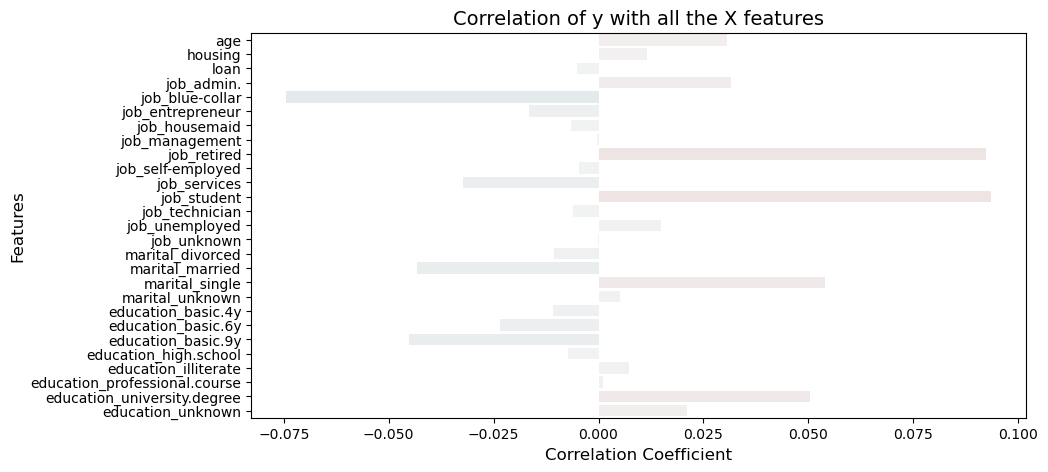

In [35]:
# **************************
# I tried improving models through selection of polynomial features, prunning decision tree, but nothing 
# improved the models and all results were very similar. So I decided to explore which features influenced
# the outcome the most and try to run the models for just these features.

# Exploring correlation of y with all the X features
# Concatenating X and y horizontally
combined_data = pd.concat([X, y], axis=1)

# Calculating the correlation matrix
corr_matrix = combined_data.corr()

# Extracting the correlation values of y ('target') with all the X features
corr_with_y = corr_matrix['term_dep'].drop('term_dep')

# Visualizing the correlation of y with all the X features using a horizontal bar plot
plt.figure(figsize=(10, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

bar_colors = [cmap((val + 1) / 2) for val in corr_with_y]
sns.barplot(y=corr_with_y.index, x=corr_with_y, palette=bar_colors, orient='h', order=corr_with_y.index)

# Adjusting font size
plt.yticks(fontsize=10) 

plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12) 
plt.title('Correlation of y with all the X features', fontsize=14)
plt.show()

In [36]:
# Adjusting X to the most important features
selected_features = [
    'age', 'job_admin.', 'job_blue-collar', 'job_retired', 'job_services',
    'job_student', 'marital_married', 'marital_single', 
    'education_basic.9y', 'education_university.degree'
]

X_filtered = X[selected_features]

In [37]:
X_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41183 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          41183 non-null  int64
 1   job_admin.                   41183 non-null  uint8
 2   job_blue-collar              41183 non-null  uint8
 3   job_retired                  41183 non-null  uint8
 4   job_services                 41183 non-null  uint8
 5   job_student                  41183 non-null  uint8
 6   marital_married              41183 non-null  uint8
 7   marital_single               41183 non-null  uint8
 8   education_basic.9y           41183 non-null  uint8
 9   education_university.degree  41183 non-null  uint8
dtypes: int64(1), uint8(9)
memory usage: 1005.4 KB


In [38]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3
                                                    , random_state=42)

Classifier: Logistic Regression
Training time: 0.12s
Training accuracy: 0.8866
Testing accuracy: 0.8893
Cross-validation scores: [0.88657648 0.88657648 0.88657648 0.88655681 0.88655681]
Mean cross-validation accuracy: 0.8866
Standard deviation of cross-validation accuracy: 0.0000
Precision: 1.0000
Recall: 0.0000
F1 score: 0.0000
AUC: 0.5000

Classifier: KNN
Training time: 0.02s
Training accuracy: 0.8868
Testing accuracy: 0.8843
Cross-validation scores: [0.8775581  0.87460978 0.87374263 0.87753686 0.87979185]
Mean cross-validation accuracy: 0.8766
Standard deviation of cross-validation accuracy: 0.0022
Precision: 0.3155
Recall: 0.0387
F1 score: 0.0690
AUC: 0.5141

Classifier: Decision Tree
Training time: 0.02s
Training accuracy: 0.8910
Testing accuracy: 0.8877
Cross-validation scores: [0.88258758 0.88258758 0.88414846 0.88360798 0.88048569]
Mean cross-validation accuracy: 0.8827
Standard deviation of cross-validation accuracy: 0.0013
Precision: 0.4174
Recall: 0.0351
F1 score: 0.0647
AUC

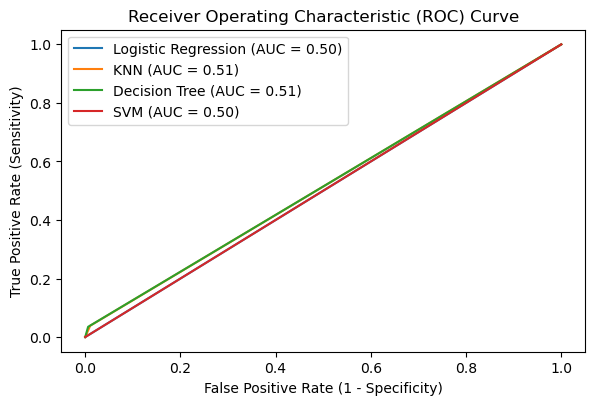

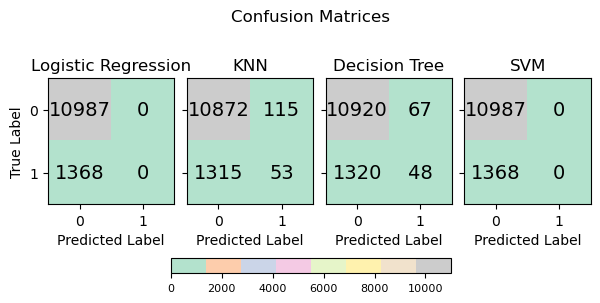

,Training time,Training accuracy,Testing accuracy
Logistic Regression,0.119056,0.886569,0.889276
KNN,0.018567,0.886846,0.884257
Decision Tree,0.020785,0.891043,0.887738
SVM,10.511653,0.886569,0.889276


In [39]:
# Initializing the classifiers
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
svm = SVC()

# Initializing dictionary to store confusion matrices
confusion_matrix_dict = {}

# Initializing an emptying DataFrame called 'table'
table = pd.DataFrame()

# Training and evaluating the classifiers
for clf, clf_name in [(logreg, 'Logistic Regression'), (knn, 'KNN'), (dt, 'Decision Tree'), (svm, 'SVM')]:
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    # Predicting using the trained classifier
    y_pred_train = clf.predict(X_train)
    training_accuracy = accuracy_score(y_train, y_pred_train)
    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    auc_score = roc_auc_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Plotting ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')
    
    # Storing confusion matrix in dictionary
    confusion_matrix_dict[clf_name] = confusion
    
    # Creating dictionary to hold results for this model
    results = {}
    results['Training time'] = training_time
    results['Training accuracy'] = training_accuracy
    results['Testing accuracy'] = accuracy
    
    # Adding results to table
    if clf_name == 'Logistic Regression':
        table = pd.DataFrame(results, index=[clf_name])
    else:
        table = pd.concat([table, pd.DataFrame(results, index=[clf_name])])

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
    print(f'Classifier: {clf_name}')
    print(f'Training time: {training_time:.2f}s')
    print(f'Training accuracy: {training_accuracy:.4f}')
    print(f'Testing accuracy: {accuracy:.4f}')
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')
    print(f'Standard deviation of cross-validation accuracy: {cv_scores.std():.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 score: {f1:.4f}')
    print(f'AUC: {auc_score:.4f}')
    print()
    
# Plotting ROC curves
plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.tight_layout()
plt.gcf().set_size_inches(6,4)
plt.show()


# Plotting confusion matrices
fig, axs = plt.subplots(1, 4, figsize=(7, 3), sharex=True, sharey=True)
fig.suptitle('Confusion Matrices')

for i, clf_name in enumerate(['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']):
    confusion = confusion_matrix_dict[clf_name]
    im = axs[i].imshow(confusion, cmap='Pastel2', interpolation='None')
    axs[i].set_xticks([0, 1])
    axs[i].set_yticks([0, 1])
    axs[i].set_xlabel('Predicted Label')
    
    if i == 0:
        axs[i].set_ylabel('True Label')
    axs[i].set_title(f'{clf_name}')
    
    for j in range(2):
        for k in range(2):
            axs[i].text(k, j, str(confusion[j, k]), horizontalalignment='center', verticalalignment='center', fontsize=14)

# Adding colorbar under plot's title
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.05])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=8)

# Adjusting spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

table.head()


In [40]:
# SUMMARY: This approach returned similar results and models are not usable. I don't believe running differnt
# parameters will improve this model based on the above experience. I need a new approach.
# **************************
# **************************
# **************************

In [41]:
# **************************
# **************************
# **************************
# I will try to simplify the values in feature columns and see if this will improve the models.

In [42]:
# create a copy of df
df_copy = df.copy()

In [43]:
# Define a function to replace the age values
def replace_age(x):
    if x < 25:
        return '<25'
    elif 25 <= x < 35:
        return '25 to 34'
    elif 35 <= x < 45:
        return '35 to 44'
    elif 45 <= x < 60:
        return '45 to 60'
    else:
        return '60+'

# Apply the function to the 'age' column
df_copy['age'] = df_copy['age'].apply(lambda x: replace_age(x))


In [44]:
counts = df_copy['age'].value_counts()
print(counts)


25 to 34    13686
35 to 44    13500
45 to 60    11741
60+          1193
<25          1063
Name: age, dtype: int64


In [45]:
# Replace values in 'marital' column
df_copy['marital'] = df_copy['marital'].replace(['single', 'divorced'], 'single or divorced')

In [46]:
counts = df_copy['marital'].value_counts()
print(counts)

married               24928
single or divorced    16175
unknown                  80
Name: marital, dtype: int64


In [47]:
# If 'unknown' has not open the term deposit then I will remove the rows.
# Count the number of entries that meet the specified conditions
count = df_copy[(df_copy['marital'] == 'unknown') & (df_copy['term_dep'] == 'yes')].shape[0]
print(count)

0


In [48]:
# Remove rows with 'unknown' value in 'marital' column
df_copy = df_copy[df_copy['marital'] != 'unknown']

In [49]:
# Replace values in 'education' column
df_copy['education'] = df_copy['education'].replace(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate'], 'no university')
df_copy['education'] = df_copy['education'].replace(['professional.course', 'university.degree'], 'above highschool')

In [50]:
counts = df_copy['education'].value_counts()
print(counts)

no university       22009
above highschool    17374
unknown              1720
Name: education, dtype: int64


In [51]:
# If 'unknown' has not open the term deposit then I will remove the rows.
# Count the number of entries that meet the specified conditions
count = df_copy[(df_copy['education'] == 'unknown') & (df_copy['term_dep'] == 'yes')].shape[0]
print(count)

0


In [52]:
# Remove rows with 'unknown' value in 'marital' column
df_copy = df_copy[df_copy['education'] != 'unknown']

In [53]:
# Replace values in 'job' column
df_copy['job'] = df_copy['job'].replace(['retired', 'student', 'unemployed'], 'not working')
df_copy.loc[~df_copy['job'].isin(['not working', 'unknown']), 'job'] = 'working'
df_copy.loc[df_copy['job'].isnull(), 'job'] = 'unknown'

In [54]:
counts = df_copy['job'].value_counts()
print(counts)

working        35877
not working     3311
unknown          195
Name: job, dtype: int64


In [55]:
# If 'unknown' has not open the term deposit then I will remove the rows.
# Count the number of entries that meet the specified conditions
count = df_copy[(df_copy['job'] == 'unknown') & (df_copy['term_dep'] == 'yes')].shape[0]
print(count)

0


In [56]:
# Remove rows with 'unknown' value in 'marital' column
df_copy = df_copy[df_copy['job'] != 'unknown']

In [57]:
df_copy.head()

,age,job,marital,education,housing,loan,term_dep
0,45 to 60,working,married,no university,0.0,0.0,0
1,45 to 60,working,married,no university,0.0,0.0,0
2,35 to 44,working,married,no university,2.0,0.0,0
3,35 to 44,working,married,no university,0.0,0.0,0
4,45 to 60,working,married,no university,0.0,2.0,0


In [58]:
# Spliting the dataframe into the feature columns and the target column
X = df_copy.drop('term_dep', axis=1)
y = df_copy['term_dep']

In [59]:
X = pd.get_dummies(X, columns=['job', 'marital', 'education', 'age'])

In [60]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
                                                    , random_state=42)

Classifier: Logistic Regression
Training time: 0.04s
Training accuracy: 0.8892
Testing accuracy: 0.8865
Cross-validation scores: [0.88882814 0.889537   0.88862559 0.88899016 0.88917244]
Mean cross-validation accuracy: 0.8890
Standard deviation of cross-validation accuracy: 0.0003
Precision: 0.2308
Recall: 0.0023
F1 score: 0.0045
AUC: 0.5007

Classifier: KNN
Training time: 0.02s
Training accuracy: 0.8835
Testing accuracy: 0.8807
Cross-validation scores: [0.88481866 0.88862559 0.88625592 0.88297485 0.8855268 ]
Mean cross-validation accuracy: 0.8856
Standard deviation of cross-validation accuracy: 0.0018
Precision: 0.3272
Recall: 0.0535
F1 score: 0.0919
AUC: 0.5197

Classifier: Decision Tree
Training time: 0.01s
Training accuracy: 0.8898
Testing accuracy: 0.8873
Cross-validation scores: [0.88973938 0.889537   0.88844331 0.88807875 0.88789646]
Mean cross-validation accuracy: 0.8887
Standard deviation of cross-validation accuracy: 0.0008
Precision: 0.6000
Recall: 0.0068
F1 score: 0.0134
AUC

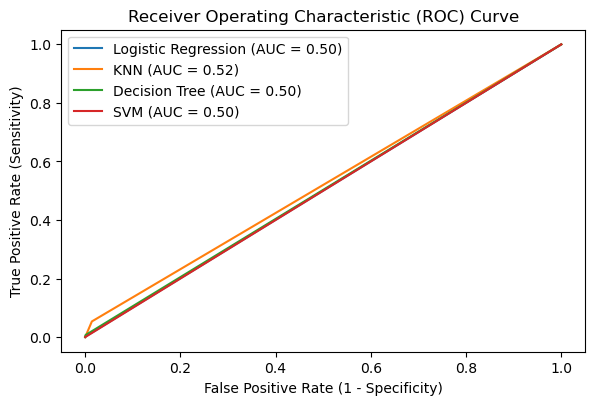

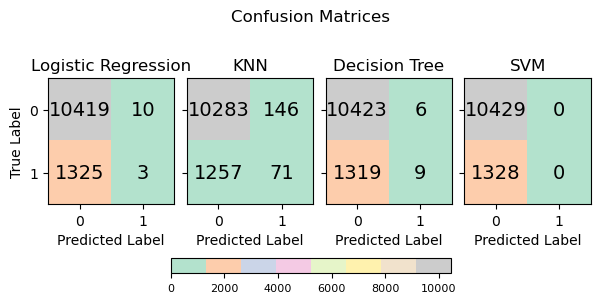

,Training time,Training accuracy,Testing accuracy
Logistic Regression,0.039697,0.889176,0.886451
KNN,0.019131,0.883489,0.880667
Decision Tree,0.011305,0.889796,0.887301
SVM,9.788110,0.889505,0.887046


In [61]:
# Initialize the classifiers
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
svm = SVC()

# Initialize dictionary to store confusion matrices
confusion_matrix_dict = {}

# Train and evaluate the classifiers
for clf, clf_name in [(logreg, 'Logistic Regression'), (knn, 'KNN'), (dt, 'Decision Tree'), (svm, 'SVM')]:
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    # Predict using the trained classifier
    y_pred_train = clf.predict(X_train)
    training_accuracy = accuracy_score(y_train, y_pred_train)
    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    auc_score = roc_auc_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')
    
    # Store confusion matrix in dictionary
    confusion_matrix_dict[clf_name] = confusion
    
    # Create dictionary to hold results for this model
    results = {}
    results['Training time'] = training_time
    results['Training accuracy'] = training_accuracy
    results['Testing accuracy'] = accuracy
    
    # Add results to table
    if clf_name == 'Logistic Regression':
        table = pd.DataFrame(results, index=[clf_name])
    else:
        table = pd.concat([table, pd.DataFrame(results, index=[clf_name])])

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
    print(f'Classifier: {clf_name}')
    print(f'Training time: {training_time:.2f}s')
    print(f'Training accuracy: {training_accuracy:.4f}')
    print(f'Testing accuracy: {accuracy:.4f}')
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')
    print(f'Standard deviation of cross-validation accuracy: {cv_scores.std():.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 score: {f1:.4f}')
    print(f'AUC: {auc_score:.4f}')
    print()
    
# Plot ROC curves
plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.tight_layout()
plt.gcf().set_size_inches(6,4)
plt.show()


# Plot confusion matrices
fig, axs = plt.subplots(1, 4, figsize=(7, 3), sharex=True, sharey=True)
fig.suptitle('Confusion Matrices')

for i, clf_name in enumerate(['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']):
    confusion = confusion_matrix_dict[clf_name]
    im = axs[i].imshow(confusion, cmap='Pastel2', interpolation='None')
    axs[i].set_xticks([0, 1])
    axs[i].set_yticks([0, 1])
    axs[i].set_xlabel('Predicted Label')
    
    if i == 0:
        axs[i].set_ylabel('True Label')
    axs[i].set_title(f'{clf_name}')
    
    for j in range(2):
        for k in range(2):
            axs[i].text(k, j, str(confusion[j, k]), horizontalalignment='center', verticalalignment='center', fontsize=14)

# Add colorbar under plot's title
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.3, 0.1, 0.4, 0.05])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=8)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

table.head()


In [62]:
# SUMMARY: This approach returned similar results and models are not usable. I don't believe running differnt
# parameters will improve this model based on the above experience.
# **************************
# **************************
# **************************

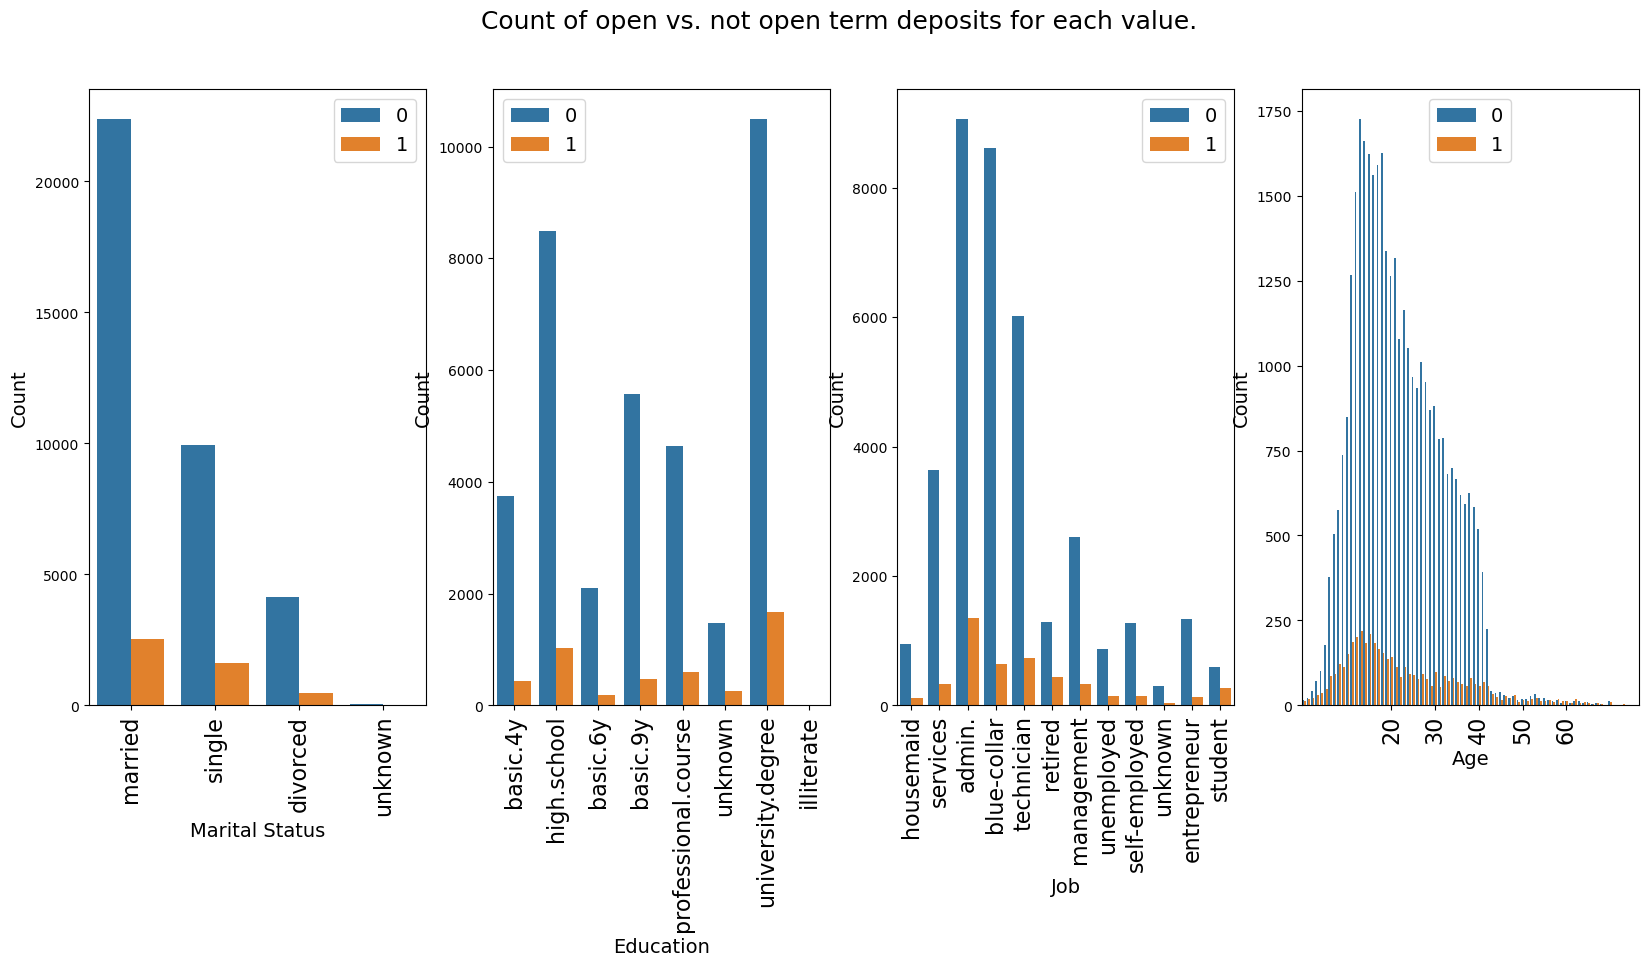

In [63]:
# **************************
# **************************
# **************************
# After reviewing all the models from 3 notebooks I am realizing that there might be something going on with the data 
# since the AUC always comes back between 50% - 59% which is equivalent to random guessing. 
# I decided to explore relationship bewtween values and opening/not opening the term deposit.
# **************************
# **************************
# **************************

# set up the subplots
fig, axs = plt.subplots(ncols=4, figsize=(20, 8))

# set the title for the entire subplot
fig.suptitle('Count of open vs. not open term deposits for each value.', fontsize=18)

# plot the first countplot
sns.countplot(x='marital', data=df, hue='term_dep', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, fontsize=16)
axs[0].set_xlabel('Marital Status', fontsize=14)
axs[0].set_ylabel('Count', fontsize=14)
axs[0].legend(fontsize=14)

# plot the second countplot
sns.countplot(x='education', data=df, hue='term_dep', ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, fontsize=16)
axs[1].set_xlabel('Education', fontsize=14)
axs[1].set_ylabel('Count', fontsize=14)
axs[1].legend(fontsize=14)

# plot the third countplot
sns.countplot(x='job', data=df, hue='term_dep', ax=axs[2])
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90, fontsize=16)
axs[2].set_xlabel('Job', fontsize=14)
axs[2].set_ylabel('Count', fontsize=14)
axs[2].legend(fontsize=14)

# plot the fourth countplot
sns.countplot(x='age', data=df, hue='term_dep', ax=axs[3])
axs[3].set_xticks([20, 30, 40, 50, 60])
axs[3].set_xticklabels(['20', '30', '40', '50', '60'], rotation=90, fontsize=16)
axs[3].set_xlabel('Age', fontsize=14)
axs[3].set_ylabel('Count', fontsize=14)
axs[3].legend(fontsize=14)

# display the plot
plt.show()


In [ ]:
# After visual inspection of the above plots I noticed that the ratio of opening/not opening account for each value is
# very similar between all values of the same feature. For example for marital status the ratio of opening or not the 
# account for married is similar to ratio of single and ratio for divorced.
# I will now plot the ratio results with a heat map and numbers to check if my visual inspection is right.

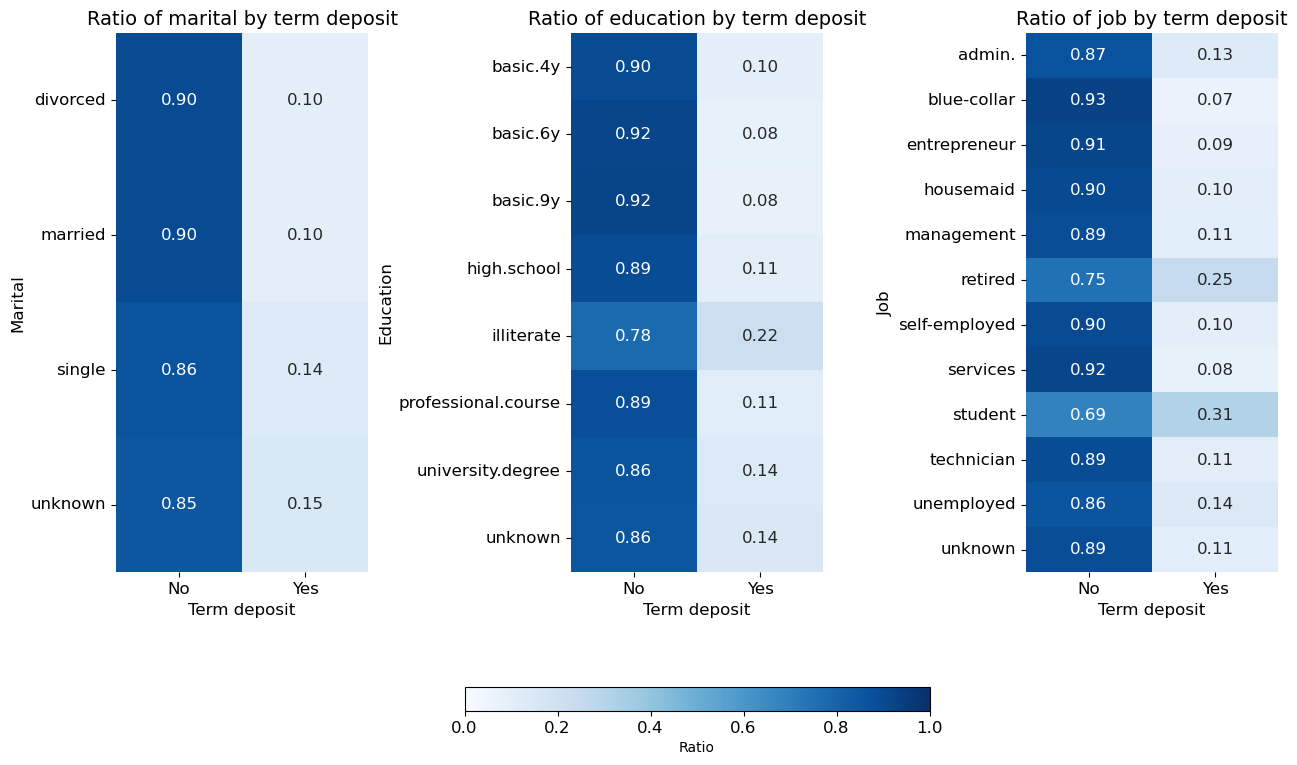

In [64]:
# Plotting the ratio results with a heat map and numbers to check if my visual inspection wass right.

# Creating the cross-tabulation tables of the selected features and term deposit
cross_tab_marital = pd.crosstab(df['marital'], df['term_dep'], normalize='index')
cross_tab_education = pd.crosstab(df['education'], df['term_dep'], normalize='index')
cross_tab_job = pd.crosstab(df['job'], df['term_dep'], normalize='index')

# Defining the heatmap parameters
cmap = 'Blues'
annot = True
fmt = '.2f'
vmin = 0
vmax = 1

# Creating a figure with one row and three columns
fig, axs = plt.subplots(ncols=3, figsize=(15, 10), gridspec_kw={'width_ratios': [0.4, 0.4, 0.4], 'wspace': .8})

# Plotting the cross-tabulation table of marital in the first column
sns.heatmap(cross_tab_marital, cmap=cmap, annot=annot, fmt=fmt, ax=axs[0], vmin=vmin, vmax=vmax, cbar=False, xticklabels=['No', 'Yes'], yticklabels=True, annot_kws={"fontsize":12})
axs[0].set_title('Ratio of marital by term deposit', fontsize=14)
axs[0].set_xlabel('Term deposit', fontsize=12)
axs[0].set_ylabel('Marital', fontsize=12)
axs[0].tick_params(axis='y', rotation=0, labelsize=12)

# Plotting the cross-tabulation table of education in the second column
sns.heatmap(cross_tab_education, cmap=cmap, annot=annot, fmt=fmt, ax=axs[1], vmin=vmin, vmax=vmax, cbar=False, xticklabels=['No', 'Yes'], yticklabels=True, annot_kws={"fontsize":12})
axs[1].set_title('Ratio of education by term deposit', fontsize=14)
axs[1].set_xlabel('Term deposit', fontsize=12)
axs[1].set_ylabel('Education', fontsize=12)
axs[1].tick_params(axis='y', rotation=0, labelsize=12)

# Plotting the cross-tabulation table of job in the third column
sns.heatmap(cross_tab_job, cmap=cmap, annot=annot, fmt=fmt, ax=axs[2], vmin=vmin, vmax=vmax, cbar=False, xticklabels=['No', 'Yes'], yticklabels=True, annot_kws={"fontsize":12})
axs[2].set_title('Ratio of job by term deposit', fontsize=14)
axs[2].set_xlabel('Term deposit', fontsize=12)
axs[2].set_ylabel('Job', fontsize=12)
axs[2].tick_params(axis='y', rotation=0, labelsize=12)

# Setting the rotation and font size of the x-axis labels
for ax in axs:
    ax.tick_params(axis='x', labelrotation=0, labelsize=12)

# Adding a single colorbar for the entire row and adjusting its size
cbar = fig.colorbar(axs[0].collections[0], ax=axs, orientation='horizontal', label='Ratio', shrink=0.4)
cbar.ax.tick_params(labelsize=12)

#Displaying the plot
plt.show()

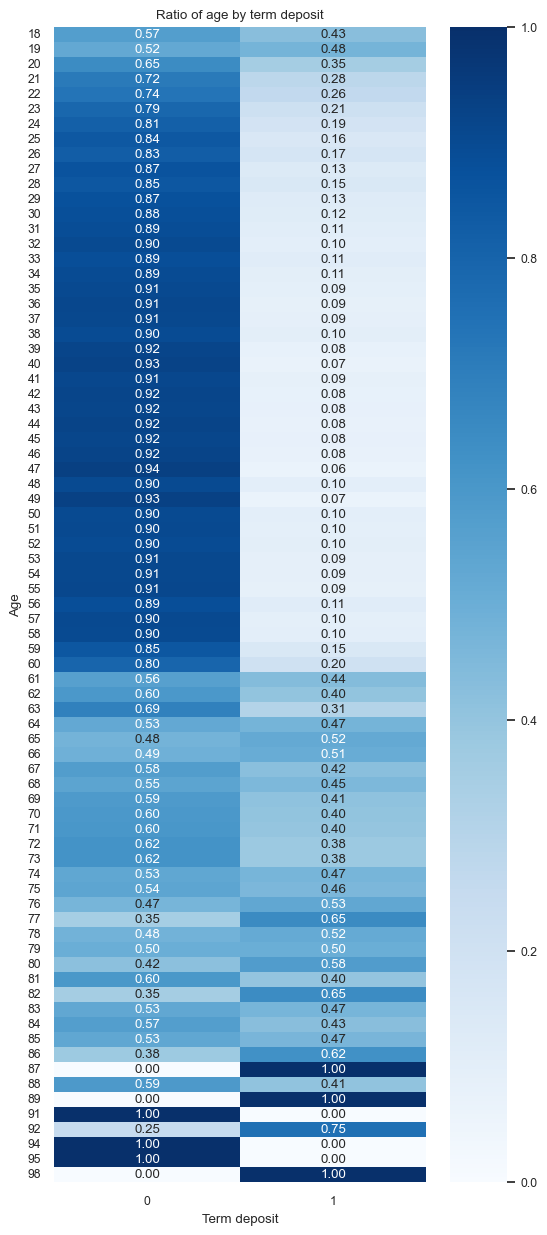

In [65]:
# Plotting a separate chart for 'age' to make it more readable
# Set the font scale to 0.8
sns.set(font_scale=0.8)

# Create a cross-tabulation table of age and term_dep
cross_tab = pd.crosstab(df['age'], df['term_dep'], normalize='index')

# Set the figure size
fig, ax = plt.subplots(figsize=(6, 15))

# Plot the cross-tabulation table as a heatmap
sns.heatmap(cross_tab, cmap='Blues', annot=True, fmt='.2f', ax=ax)
plt.title('Ratio of age by term deposit')
plt.xlabel('Term deposit')
plt.ylabel('Age')
ax.tick_params(axis='y', rotation=0)  # set y-axis tick label rotation to 0 degrees
plt.show()

In [ ]:
# As I expected all values that were selected for creating the best ML model are having similar proportions
# for opening and not opening the term deposit account. One could say that age might be exception, but in reality 
# the ratios between age 25 and 60 are similar as well. We do need to keep in mind that 60+ have only around 1100
# entries and age less than 25 have only around 1000 entries. Hence we can't get a usable ML model because none
# of the values show enough difference to create a model.
# **************************
# **************************
# **************************

In [66]:
# **************************
# **************************
# **************************
# FINAL SUMMARY
# After exploring the dataset with balanced and unbalanced data and running many models I discovered that even though 
# most models had very high accuracy the other parameters (Precision, Recall, F1 score) were very poor and with AUC
# hovering between 50% - 59% models resembled a random chance. That led me to deeper exploration of values used for
# creating the model and it turned out that all of them are having similar proportions for opening and not opening 
# the term deposit account. Hence we can't get a usable ML model because none of the values show enough difference 
# to create a model.
# In order to create a model we would need to explore other features from the original data set. Hopefully other
# features may contain more useful information for predicting the term deposit account opening.
# **************************
# **************************
# **************************

##### Questions